In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

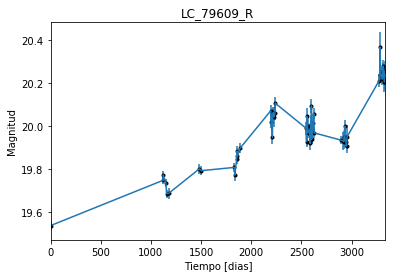

In [2]:
data = np.genfromtxt('LC_79609_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79609_R')
plt.savefig("LC_79609_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

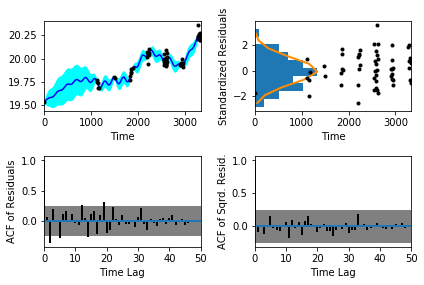

In [5]:
sample.assess_fit()

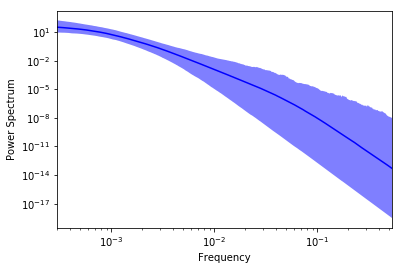

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

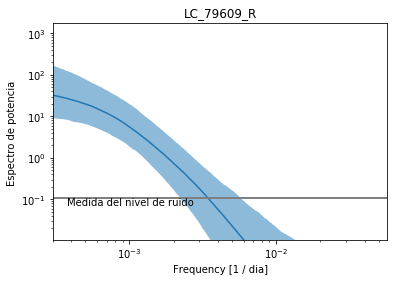

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79609_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79609_R')

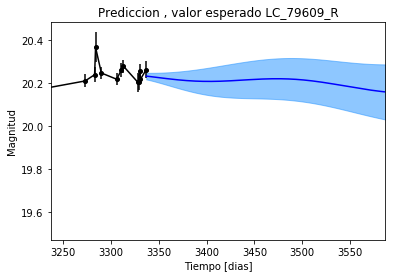

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79609_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79609_R')

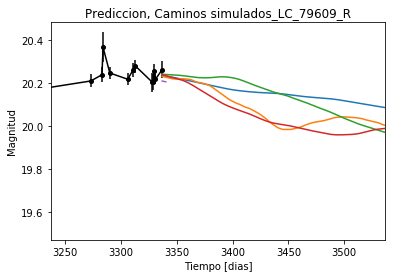

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79609_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


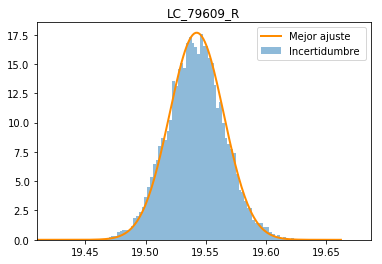

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79609_R')
plt.savefig("Mejor_ajuste_LC_79609_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79609_R')

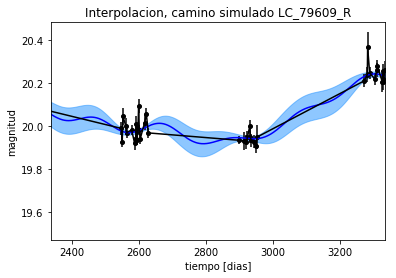

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_R')

Text(0.5,1,'Interpolacion, camino simulado LC_79609_R')

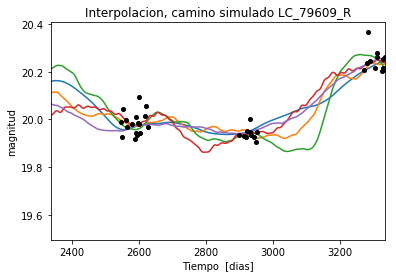

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1083.25110371
Median: 0.0161591588817
Standard deviation: 0.230308914234
68% credibility interval: [ 0.00107032  0.25866984]
95% credibility interval: [  3.67876949e-04   8.80993400e-01]
99% credibility interval: [  3.14276221e-04   1.04000554e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 476.438056696
Median: 0.00110140041262
Standard deviation: 0.0744817218423
68% credibility interval: [ 0.00041477  0.01100662]
95% credibility interval: [ 0.00031361  0.18471571]
99% credibility interval: [  3.02101694e-04   5.76971561e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 331.659917157
Median: 0.0107131843943
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1822.40042497
Median: 118.879130313
Standard deviation: 1.51737900984
68% credibility interval: [ 117.19403152  119.96882165]
95% credibility interval: [ 114.81335656  120.59237489]
99% credibility interval: [ 112.83218269  120.8804786 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 389.893661734
Median: 0.718693029902
Standard deviation: 2.24048303879
68% credibility interval: [ 0.05358485  4.25982194]
95% credibility interval: [ 0.0124523   7.12594478]
99% credibility interval: [  9.40255800e-03   1.04640171e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 406.508085909
Median: 0.186391948129
Standard deviation: 7.81318190465
68% credibility interval: [ 0.0106662   4.19669189]
95% credibility interval: [  7.2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 869.948968186
Median: 8.4276497635e-39
Standard deviation: 15.9821252829
68% credibility interval: [  5.06552696e-75   3.50511510e-08]
95% credibility interval: [  1.91590762e-150   9.51254153e-001]
99% credibility interval: [  7.56064780e-173   2.90293217e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2866.10256619
Median: 19.8711636979
Standard deviation: 0.138265888713
68% credibility interval: [ 19.74925054  19.9814031 ]
95% credibility interval: [ 19.58622289  20.13668465]
99% credibility interval: [ 19.41999989  20.32359418]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 291.854235659
Median: 0.0
Standard deviation: 0.208976906212
68% credibility interval: [ 0.          0.15755572]
95% credibility interval: [ 0.          0.80298192]
99% credibility interval: [ 0.          1.01628931]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 291.854235659
Median: 0.0
Standard deviation: 0.208976906212
68% credibility interval: [ 0.          0.15755572]
95% credibility interval: [ 0.          0.80298192]
99% credibility interval: [ 0.          1.01628931]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1113.86200034
Median: 0.0
Standard deviation: 0.000231512908754
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1822.40042497
Median: 118.879130313
Standard deviation: 1.51737900984
68% credibility interval: [ 117.19403152  119.96882165]
95% credibility interval: [ 114.81335656  120.59237489]
99% credibility interval: [ 112.83218269  120.8804786 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1301.47337051
Median: 0.055650488304
Standard deviation: 0.0671419188554
68% credibility interval: [ 0.03149942  0.11495087]
95% credibility interval: [ 0.0206261   0.25683975]
99% credibility interval: [ 0.01544212  0.41384126]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1806.05418853
Median: 1.30744766822
Standard deviation: 0.194677630188
68% credibility interval: [ 1.12906506  1.502957  ]
95% credibility interval: [ 0.97142705  1.7365743 ]
99% credibility interval: [ 0.82765174  1.88572589]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 254.642753654
Median: 3.064952876e-05
Standard deviation: 0.0801163295431
68% credibility interval: [  1.41571913e-06   8.24151846e-04]
95% credibility interval: [  6.42198987e-08   8.95707398e-03]
99% credibility interval: [  2.33305666e-08   9.51897346e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1083.25110371
Median: (-0.101530989662-0.147785520144j)
Standard deviation: 1.95399530466
68% credibility interval: [-1.62527052-1.07855879j -0.00672500-4.44288954j]
95% credibility interval: [ -5.53544479e+00+0.j         -2.31143904e-03-0.0622045j]
99% credibility interval: [ -6.53454753e+00+0.j          -1.97465573e-03-0.00320571j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 476.438056696
Median: (-0.00692030288987+4.35788347991j)
Standard deviation: 1.39394521787
68% credibility interval: [-0.06915661+4.0255123j  -0.00260606+1.38891392j]
95% credibility interval: [-1.16060306+2.52845141j -0.00197050+0.j        ]
99% credibility interval: [ -3.62521923e+00+5.45072063j  -1.89816092e-03+0.j        ]
Posterior summa